In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/summer-analytics-mid-hackathon/hacktest.csv
/kaggle/input/summer-analytics-mid-hackathon/hacktrain.csv


In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from scipy.signal import savgol_filter

In [ ]:

!pip uninstall -y scikit-learn imbalanced-learn numpy scipy joblib
!pip cache purge  # Clear any cached wheels (optional but helpful)

!pip install numpy==1.24.4 scipy==1.11.4 joblib==1.3.2
!pip install scikit-learn==1.3.2 imbalanced-learn==0.11.0


In [3]:
X_train=pd.read_csv("/kaggle/input/summer-analytics-mid-hackathon/hacktrain.csv",index_col=0)
X_test=pd.read_csv("/kaggle/input/summer-analytics-mid-hackathon/hacktest.csv",index_col=0)

In [4]:
X_train

,ID,class,20150720_N,20150602_N,20150517_N,20150501_N,20150415_N,20150330_N,20150314_N,20150226_N,...,20140610_N,20140525_N,20140509_N,20140423_N,20140407_N,20140322_N,20140218_N,20140202_N,20140117_N,20140101_N
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
0,1,water,637.5950,658.668,-1882.030,-1924.36,997.904,-1739.990,630.087,NaN,...,NaN,-1043.160,-1942.490,267.138,NaN,NaN,211.328,-2203.020,-1180.19,433.906
1,2,water,634.2400,593.705,-1625.790,-1672.32,914.198,-692.386,707.626,-1670.590,...,NaN,-933.934,-625.385,120.059,364.858,476.972,220.878,-2250.000,-1360.56,524.075
3,4,water,58.0174,-1599.160,NaN,-1052.63,NaN,-1564.630,NaN,729.790,...,-1025.880,368.622,NaN,-1227.800,304.621,NaN,369.214,-2202.120,NaN,-1343.550
4,5,water,72.5180,NaN,380.436,-1256.93,515.805,-1413.180,-802.942,683.254,...,-1813.950,155.624,NaN,-924.073,432.150,282.833,298.320,-2197.360,NaN,-826.727
7,8,water,1136.4400,NaN,NaN,1647.83,1935.800,NaN,2158.980,NaN,...,1535.000,1959.430,-279.317,-384.915,-113.406,1020.720,1660.650,-116.801,-568.05,-1357.140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10537,10538,impervious,1207.7000,984.620,NaN,1166.25,937.478,1072.700,823.896,943.698,...,1117.740,1176.600,1044.110,NaN,369.082,465.843,362.882,979.795,NaN,433.659
10538,10539,impervious,2170.3500,1419.720,1361.000,1478.71,983.911,1262.110,1422.860,1401.970,...,984.634,2128.970,1379.660,NaN,762.633,485.204,446.724,771.747,1589.06,506.936
10541,10542,impervious,1895.6800,1454.740,NaN,1033.56,1930.380,1057.150,1471.600,NaN,...,888.408,2093.020,1232.110,1190.830,1441.460,1170.880,1095.000,1818.650,2501.72,1247.770


In [5]:
X_train.describe()


,ID,20150720_N,20150602_N,20150517_N,20150501_N,20150415_N,20150330_N,20150314_N,20150226_N,20150210_N,...,20140610_N,20140525_N,20140509_N,20140423_N,20140407_N,20140322_N,20140218_N,20140202_N,20140117_N,20140101_N
count,8000.000000,7440.000000,6800.000000,7200.000000,7040.000000,7520.000000,6880.000000,7280.000000,6640.000000,7360.000000,...,7520.000000,7280.000000,7120.000000,6240.000000,7360.000000,6880.000000,6560.000000,7440.000000,6800.000000,7600.000000
mean,4985.202625,5845.476916,4868.091395,4469.837748,5193.485086,2927.586705,4924.493648,3313.881373,4987.520158,4320.961814,...,4872.681670,3674.886731,3012.178524,3055.167358,2041.316792,2799.820342,2144.360224,6259.064275,2629.203972,2578.449870
std,2900.022898,2261.409128,2758.499942,2876.218394,2510.389832,2728.325670,2600.418802,2434.828743,2674.963286,2807.501097,...,2776.135418,2331.105635,2068.334108,2209.985887,2040.354512,2452.563243,2267.606759,1825.563702,2386.147667,2436.270797
min,1.000000,-433.735000,-1781.790000,-2939.740000,-1924.360000,-1794.870000,-1848.910000,-1574.970000,-2532.490000,-3403.050000,...,-2683.600000,-1043.160000,-2435.900000,-1505.780000,-1445.370000,55.564100,-232.292000,-2729.430000,-2139.860000,-4145.250000
25%,2515.750000,4331.232500,2067.265000,1521.195000,3087.072500,500.515750,2398.385000,992.778250,2404.075000,1377.927500,...,2010.732500,1369.355000,1368.742500,1009.827500,419.987000,791.741250,501.602750,5938.257500,691.171500,689.199000
50%,4918.500000,6908.255000,5513.375000,4672.000000,5810.755000,1586.240000,5742.485000,2802.010000,5831.120000,4497.485000,...,5484.905000,3659.770000,2633.695000,2624.125000,1183.715000,1599.385000,969.711500,6941.010000,1521.210000,1439.950000
75%,7312.250000,7626.845000,7555.570000,7431.697500,7511.880000,5703.067500,7280.110000,5508.350000,7430.915000,7217.497500,...,7607.755000,5927.035000,4128.082500,4952.317500,3075.997500,4909.997500,3227.380000,7395.612500,4452.257500,4146.342500
max,10545.000000,8376.150000,8566.420000,8650.500000,8516.100000,8267.120000,8499.330000,8001.700000,8452.380000,8422.060000,...,8489.970000,7981.820000,8445.410000,7762.980000,8078.080000,8216.700000,8247.630000,8410.330000,8418.230000,8502.020000


In [6]:
X_train.isnull().sum()

ID               0
class            0
20150720_N     560
20150602_N    1200
20150517_N     800
20150501_N     960
20150415_N     480
20150330_N    1120
20150314_N     720
20150226_N    1360
20150210_N     640
20150125_N    1040
20150109_N     880
20141117_N    1280
20141101_N     400
20141016_N    1440
20140930_N     800
20140813_N     560
20140626_N    1600
20140610_N     480
20140525_N     720
20140509_N     880
20140423_N    1760
20140407_N     640
20140322_N    1120
20140218_N    1440
20140202_N     560
20140117_N    1200
20140101_N     400
dtype: int64

In [7]:
ndvi_cols = [col for col in X_train.columns if col.endswith('_N')]

In [8]:
X_train[ndvi_cols] = X_train[ndvi_cols].interpolate(axis=1, method='linear', limit_direction='both')
X_test[ndvi_cols]=X_test[ndvi_cols].interpolate(axis=1,method='linear',limit_direction='both')


In [9]:
X=X_train.copy()

In [10]:
X_train.isnull().sum()

ID            0
class         0
20150720_N    0
20150602_N    0
20150517_N    0
20150501_N    0
20150415_N    0
20150330_N    0
20150314_N    0
20150226_N    0
20150210_N    0
20150125_N    0
20150109_N    0
20141117_N    0
20141101_N    0
20141016_N    0
20140930_N    0
20140813_N    0
20140626_N    0
20140610_N    0
20140525_N    0
20140509_N    0
20140423_N    0
20140407_N    0
20140322_N    0
20140218_N    0
20140202_N    0
20140117_N    0
20140101_N    0
dtype: int64

In [11]:
X_train["class"].value_counts()

class
forest        6159
farm           841
impervious     669
grass          196
water          105
orchard         30
Name: count, dtype: int64

In [12]:
X

,ID,class,20150720_N,20150602_N,20150517_N,20150501_N,20150415_N,20150330_N,20150314_N,20150226_N,...,20140610_N,20140525_N,20140509_N,20140423_N,20140407_N,20140322_N,20140218_N,20140202_N,20140117_N,20140101_N
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
0,1,water,637.5950,658.668000,-1882.030000,-1924.360,997.904,-1739.990,630.087,-347.7765,...,-193.6950,-1043.160,-1942.4900,267.1380,248.534667,229.931333,211.3280,-2203.020,-1180.1900,433.906
1,2,water,634.2400,593.705000,-1625.790000,-1672.320,914.198,-692.386,707.626,-1670.5900,...,-133.6655,-933.934,-625.3850,120.0590,364.858000,476.972000,220.8780,-2250.000,-1360.5600,524.075
3,4,water,58.0174,-1599.160000,-1325.895000,-1052.630,-1308.630,-1564.630,-417.420,729.7900,...,-1025.8800,368.622,-429.5890,-1227.8000,304.621000,336.917500,369.2140,-2202.120,-1772.8350,-1343.550
4,5,water,72.5180,226.477000,380.436000,-1256.930,515.805,-1413.180,-802.942,683.2540,...,-1813.9500,155.624,-384.2245,-924.0730,432.150000,282.833000,298.3200,-2197.360,-1512.0435,-826.727
7,8,water,1136.4400,1306.903333,1477.366667,1647.830,1935.800,2047.390,2158.980,1700.9250,...,1535.0000,1959.430,-279.3170,-384.9150,-113.406000,1020.720000,1660.6500,-116.801,-568.0500,-1357.140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10537,10538,impervious,1207.7000,984.620000,1075.435000,1166.250,937.478,1072.700,823.896,943.6980,...,1117.7400,1176.600,1044.1100,706.5960,369.082000,465.843000,362.8820,979.795,706.7270,433.659
10538,10539,impervious,2170.3500,1419.720000,1361.000000,1478.710,983.911,1262.110,1422.860,1401.9700,...,984.6340,2128.970,1379.6600,1071.1465,762.633000,485.204000,446.7240,771.747,1589.0600,506.936
10541,10542,impervious,1895.6800,1454.740000,1244.150000,1033.560,1930.380,1057.150,1471.600,2082.6150,...,888.4080,2093.020,1232.1100,1190.8300,1441.460000,1170.880000,1095.0000,1818.650,2501.7200,1247.770


In [13]:
from scipy.signal import savgol_filter

def apply_savgol(row):
    # Use a window length of 5 and polynomial order 2
    return savgol_filter(row, window_length=5, polyorder=2)

# Apply filter to all NDVI rows
X_train[ndvi_cols] = X_train[ndvi_cols].apply(apply_savgol, axis=1, result_type='expand')
X_test[ndvi_cols]=X_test[ndvi_cols].apply(apply_savgol,axis=1,result_type='expand')

In [14]:
import matplotlib.pyplot as plt


sample_index = 0
original_ndvi = X.loc[sample_index, ndvi_cols].values
smoothed_ndvi = X_train.loc[sample_index, ndvi_cols].values

In [15]:
X_test.isnull().sum()

ID            0
20150720_N    0
20150602_N    0
20150517_N    0
20150501_N    0
20150415_N    0
20150330_N    0
20150314_N    0
20150226_N    0
20150210_N    0
20150125_N    0
20150109_N    0
20141117_N    0
20141101_N    0
20141016_N    0
20140930_N    0
20140813_N    0
20140626_N    0
20140610_N    0
20140525_N    0
20140509_N    0
20140423_N    0
20140407_N    0
20140322_N    0
20140218_N    0
20140202_N    0
20140117_N    0
20140101_N    0
dtype: int64

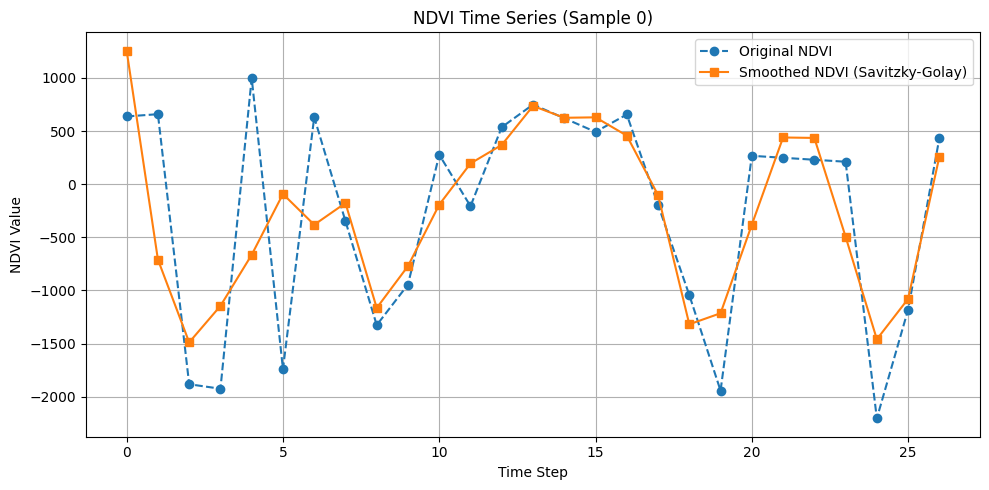

In [16]:
plt.figure(figsize=(10, 5))
plt.plot(original_ndvi, label='Original NDVI', marker='o', linestyle='--')
plt.plot(smoothed_ndvi, label='Smoothed NDVI (Savitzky-Golay)', marker='s')
plt.title(f"NDVI Time Series (Sample {sample_index})")
plt.xlabel("Time Step")
plt.ylabel("NDVI Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [17]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

X_train['class_encoded'] = le.fit_transform(X_train['class'])


In [18]:
y=X_train["class_encoded"]

In [19]:
X_train.drop(["class","ID","class_encoded"],axis=1,inplace=True)

In [20]:
X_train

,20150720_N,20150602_N,20150517_N,20150501_N,20150415_N,20150330_N,20150314_N,20150226_N,20150210_N,20150125_N,...,20140610_N,20140525_N,20140509_N,20140423_N,20140407_N,20140322_N,20140218_N,20140202_N,20140117_N,20140101_N
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
0,1255.858829,-709.114314,-1488.266029,-1145.133314,-664.342943,-92.215100,-381.671743,-177.331843,-1164.565371,-770.517071,...,-102.572229,-1318.190400,-1214.260371,-381.326629,439.525924,435.280876,-493.986343,-1459.119886,-1078.721276,259.188286
1,1171.038543,-591.087571,-1292.203543,-1047.785743,-288.017543,506.287314,-424.078400,-907.633857,-1675.167371,-740.358894,...,-136.751129,-781.299143,-602.617786,8.159000,416.585114,615.062257,-415.265829,-1569.409286,-1172.291343,316.508886
3,-207.970160,-1027.151240,-1445.995920,-1143.361143,-1383.539571,-1324.079714,-105.768857,-621.750971,-1754.836914,-1680.373743,...,-603.065400,-124.705543,-441.410629,-699.680986,-152.311657,688.667929,-334.318571,-1464.559843,-1743.815671,-1480.986357
4,313.631657,-55.957429,-218.942657,-201.508829,-628.717629,-735.676457,-441.952600,-683.732171,-1545.299457,-1513.457286,...,-550.655529,-657.369829,-331.651557,-469.985886,-2.589043,655.374286,-418.948671,-1436.803429,-1516.847814,-951.084271
7,1146.512000,1290.116667,1467.294667,1683.092286,1895.491429,2111.335000,2061.326571,2043.825857,200.697429,-1563.445571,...,1803.910314,1299.725029,282.314543,-577.048029,44.507400,1069.266171,1174.927029,346.709800,-461.149200,-1487.842200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10537,1144.433114,1110.991143,1075.922886,1080.264171,1060.186657,944.072686,930.191914,883.542171,971.458314,1032.235257,...,1074.011314,1187.588229,1025.364457,686.945914,460.648171,332.677886,579.692086,765.523343,705.599971,469.934457
10538,2043.814657,1664.977571,1384.439343,1292.328914,1178.992771,1191.288057,1402.508771,1433.332000,1388.280943,853.485086,...,1575.956971,1616.897386,1617.537629,1030.699557,747.480429,492.344900,446.361171,987.791057,992.442629,769.237343
10541,1964.275143,1355.771429,1129.484857,1375.120286,1421.649429,1412.765286,1394.924286,2145.231857,2624.230571,2210.106886,...,1539.534171,1501.600171,1524.641886,1215.292857,1310.400286,1180.401143,1218.852000,1909.192571,1894.048286,1536.515429


In [22]:
from imblearn.over_sampling import ADASYN
adasyn=ADASYN()
X_res, y_res = adasyn.fit_resample(X_train, y)

In [23]:
def extract_features(row):
    ndvi_values = row.values
    features = {}
    features['mean_ndvi'] = np.mean(ndvi_values)
    features['std_ndvi'] = np.std(ndvi_values)
    features['min_ndvi'] = np.min(ndvi_values)
    features['max_ndvi'] = np.max(ndvi_values)
    features['range_ndvi'] = features['max_ndvi'] - features['min_ndvi']
    
    # Split into 3 seasons
    features['mean_early'] = np.mean(ndvi_values[:9])
    features['mean_mid'] = np.mean(ndvi_values[9:18])
    features['mean_late'] = np.mean(ndvi_values[18:27])
    
    # Linear trend (slope)
    x = np.arange(len(ndvi_values))
    slope = np.polyfit(x, ndvi_values, 1)[0]
    features['trend_slope'] = slope
    
    # Median
    features['median_ndvi'] = np.median(ndvi_values)
    
    return pd.Series(features)

# Apply on entire dataset
features_df = pd.DataFrame(X_res[ndvi_cols].apply(extract_features, axis=1))
test_df=pd.DataFrame(X_test[ndvi_cols].apply(extract_features, axis=1))

In [24]:
X=pd.concat([X_res,features_df],axis=1)
X_te=pd.concat([X_test,test_df],axis=1)

In [25]:
X

,20150720_N,20150602_N,20150517_N,20150501_N,20150415_N,20150330_N,20150314_N,20150226_N,20150210_N,20150125_N,...,mean_ndvi,std_ndvi,min_ndvi,max_ndvi,range_ndvi,mean_early,mean_mid,mean_late,trend_slope,median_ndvi
0,1255.858829,-709.114314,-1488.266029,-1145.133314,-664.342943,-92.215100,-381.671743,-177.331843,-1164.565371,-770.517071,...,-275.255813,751.313383,-1488.266029,1255.858829,2744.124857,-507.420203,216.276076,-534.623313,1.432269,-192.348000
1,1171.038543,-591.087571,-1292.203543,-1047.785743,-288.017543,506.287314,-424.078400,-907.633857,-1675.167371,-740.358894,...,-251.609034,722.944540,-1675.167371,1171.038543,2846.205914,-505.405352,104.419154,-353.840903,3.480566,-216.902623
2,-207.970160,-1027.151240,-1445.995920,-1143.361143,-1383.539571,-1324.079714,-105.768857,-621.750971,-1754.836914,-1680.373743,...,-620.933093,780.253422,-1754.836914,847.319343,2602.156257,-1001.606055,-221.957521,-639.235703,8.437050,-603.065400
3,313.631657,-55.957429,-218.942657,-201.508829,-628.717629,-735.676457,-441.952600,-683.732171,-1545.299457,-1513.457286,...,-321.787432,688.920794,-1545.299457,817.947486,2363.246943,-466.461730,71.089014,-569.989579,-13.972559,-418.948671
4,1146.512000,1290.116667,1467.294667,1683.092286,1895.491429,2111.335000,2061.326571,2043.825857,200.697429,-1563.445571,...,771.800211,1047.464636,-1563.445571,2111.335000,3674.780571,1544.410212,583.055916,187.934505,-60.902948,1069.266171
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36850,5201.334536,4943.622836,4211.736744,2745.038398,2679.210854,1845.064121,2223.371146,2554.083533,4400.738935,3331.129976,...,2992.138781,1117.117815,214.268825,5201.334536,4987.065711,3422.689011,3155.422330,2398.305002,-66.912600,2785.967957
36851,4638.891593,4352.070769,4097.418241,3880.985876,4306.647743,4397.917396,3114.442427,2711.277326,4111.005255,5321.951564,...,3543.554890,1162.718474,1007.458912,5321.951564,4314.492651,3956.739625,3677.510446,2996.414600,-73.744796,3699.760616
36852,3898.054105,3750.064094,3413.960539,2825.445619,2598.070729,2204.189983,2310.727993,2387.713734,3155.180416,2298.716448,...,2209.531530,848.924687,262.502645,3898.054105,3635.551460,2949.267468,2031.066673,1648.260449,-76.828412,2298.716448
36853,4859.727642,4575.591029,4168.606502,3560.924832,3857.797218,3669.826486,2862.178351,2675.747994,4253.107283,4818.938662,...,3428.745084,1037.118888,784.362639,4908.302820,4123.940181,3831.500815,3587.729986,2867.004451,-71.354211,3626.658722


In [26]:

X.drop(["ID"],axis=1,inplace=True)

KeyError: "['ID'] not found in axis"

In [27]:
X

,20150720_N,20150602_N,20150517_N,20150501_N,20150415_N,20150330_N,20150314_N,20150226_N,20150210_N,20150125_N,...,mean_ndvi,std_ndvi,min_ndvi,max_ndvi,range_ndvi,mean_early,mean_mid,mean_late,trend_slope,median_ndvi
0,1255.858829,-709.114314,-1488.266029,-1145.133314,-664.342943,-92.215100,-381.671743,-177.331843,-1164.565371,-770.517071,...,-275.255813,751.313383,-1488.266029,1255.858829,2744.124857,-507.420203,216.276076,-534.623313,1.432269,-192.348000
1,1171.038543,-591.087571,-1292.203543,-1047.785743,-288.017543,506.287314,-424.078400,-907.633857,-1675.167371,-740.358894,...,-251.609034,722.944540,-1675.167371,1171.038543,2846.205914,-505.405352,104.419154,-353.840903,3.480566,-216.902623
2,-207.970160,-1027.151240,-1445.995920,-1143.361143,-1383.539571,-1324.079714,-105.768857,-621.750971,-1754.836914,-1680.373743,...,-620.933093,780.253422,-1754.836914,847.319343,2602.156257,-1001.606055,-221.957521,-639.235703,8.437050,-603.065400
3,313.631657,-55.957429,-218.942657,-201.508829,-628.717629,-735.676457,-441.952600,-683.732171,-1545.299457,-1513.457286,...,-321.787432,688.920794,-1545.299457,817.947486,2363.246943,-466.461730,71.089014,-569.989579,-13.972559,-418.948671
4,1146.512000,1290.116667,1467.294667,1683.092286,1895.491429,2111.335000,2061.326571,2043.825857,200.697429,-1563.445571,...,771.800211,1047.464636,-1563.445571,2111.335000,3674.780571,1544.410212,583.055916,187.934505,-60.902948,1069.266171
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36850,5201.334536,4943.622836,4211.736744,2745.038398,2679.210854,1845.064121,2223.371146,2554.083533,4400.738935,3331.129976,...,2992.138781,1117.117815,214.268825,5201.334536,4987.065711,3422.689011,3155.422330,2398.305002,-66.912600,2785.967957
36851,4638.891593,4352.070769,4097.418241,3880.985876,4306.647743,4397.917396,3114.442427,2711.277326,4111.005255,5321.951564,...,3543.554890,1162.718474,1007.458912,5321.951564,4314.492651,3956.739625,3677.510446,2996.414600,-73.744796,3699.760616
36852,3898.054105,3750.064094,3413.960539,2825.445619,2598.070729,2204.189983,2310.727993,2387.713734,3155.180416,2298.716448,...,2209.531530,848.924687,262.502645,3898.054105,3635.551460,2949.267468,2031.066673,1648.260449,-76.828412,2298.716448
36853,4859.727642,4575.591029,4168.606502,3560.924832,3857.797218,3669.826486,2862.178351,2675.747994,4253.107283,4818.938662,...,3428.745084,1037.118888,784.362639,4908.302820,4123.940181,3831.500815,3587.729986,2867.004451,-71.354211,3626.658722


In [28]:
X_te.drop(["ID"],axis=1,inplace=True)

In [29]:
X_te

,20150720_N,20150602_N,20150517_N,20150501_N,20150415_N,20150330_N,20150314_N,20150226_N,20150210_N,20150125_N,...,mean_ndvi,std_ndvi,min_ndvi,max_ndvi,range_ndvi,mean_early,mean_mid,mean_late,trend_slope,median_ndvi
0,5463.869629,4943.044886,4186.653571,4503.613714,2752.485743,2073.366457,4885.096886,4404.136857,5664.923543,3514.367543,...,3388.390377,1414.810656,654.222400,5785.407629,5131.185229,4319.687921,2753.433063,3092.050146,-63.515296,3315.678029
1,7142.142286,5267.262857,3896.527714,2773.629429,4855.038857,4043.976286,3106.336571,2701.002571,5998.009200,5304.247486,...,3771.354843,1572.256789,60.654886,7142.142286,7081.487400,4420.436197,3152.989848,3740.638486,-69.581702,3896.527714
2,7283.200371,6049.114714,4791.813629,3045.045486,5408.604657,3523.482229,2858.267229,2233.857600,5889.232629,4780.309600,...,3809.056519,1770.699565,247.325457,7283.200371,7035.874914,4564.735394,2847.808848,4014.625314,-76.171468,3523.482229
3,5329.468486,5675.601857,5217.893514,4693.204514,4196.538657,3040.966800,5396.296657,4010.094171,3386.840743,992.000657,...,3291.402041,1607.083897,-79.514686,5675.601857,5755.116543,4549.656156,2195.178022,3129.371946,-52.693882,3386.840743
4,7583.907143,6669.455429,5478.810857,3301.526571,5428.883429,4842.913143,4331.725143,3305.070286,6580.162457,6044.583029,...,4487.209296,1823.716365,633.501143,8048.306286,7414.805143,5280.272717,3715.763330,4465.591841,-79.811501,4331.725143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2840,-1522.204309,-2683.401486,-2853.639691,-1737.882091,-1230.548034,-1429.803520,-3441.695120,-4189.337429,-4950.677400,-2810.876114,...,-1989.941020,1347.640266,-4950.677400,898.343914,5849.021314,-2671.021009,-1880.084276,-1418.717775,66.294190,-1761.595857
2841,113.847563,-889.246591,-1629.866403,-2286.337114,-2180.680286,-2294.655143,-3118.357429,-4533.108286,-5418.785429,-5003.746000,...,-2333.302033,1565.980293,-5418.785429,450.488200,5869.273629,-2470.798791,-2281.479937,-2247.627373,7.561002,-2255.856000
2842,-1727.794057,-1513.648171,-1168.757143,-955.641143,-739.359029,-1406.369600,-3661.704457,-4457.792857,-4572.589571,-2699.522286,...,-1656.407671,1231.864053,-4572.589571,913.256857,5485.846429,-2244.850670,-1373.336190,-1351.036152,42.639208,-1513.648171
2843,-2792.950629,-1416.519886,-491.754571,-15.278857,-746.639429,-1763.813829,-3527.977229,-2285.212400,-1929.292571,-957.064857,...,-1177.196625,1317.045987,-3527.977229,1194.007686,4721.984914,-1663.271044,-431.911305,-1436.407527,20.815325,-1358.963543


In [34]:
y_res

0        5
1        5
2        5
3        5
4        5
        ..
36850    5
36851    5
36852    5
36853    5
36854    5
Name: class_encoded, Length: 36855, dtype: int64

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y_res, test_size=0.2, random_state=42)

In [36]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled=scaler.transform(X_te)



In [37]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(
    multi_class='multinomial',
    solver='lbfgs',
    max_iter=100000,
    random_state=42
)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=100000, multi_class='multinomial', random_state=42)

In [38]:
y_val_pred = model.predict(X_val_scaled)

In [39]:
y_val_pred

array([0, 4, 2, ..., 3, 5, 4])

In [40]:
from sklearn.metrics import classification_report

print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print(classification_report(y_val, y_val_pred, target_names=le.classes_))


Validation Accuracy: 0.6902726902726902
              precision    recall  f1-score   support

        farm       0.59      0.51      0.55      1174
      forest       0.78      0.77      0.78      1260
       grass       0.63      0.60      0.62      1210
  impervious       0.54      0.57      0.56      1252
     orchard       0.81      0.87      0.84      1208
       water       0.77      0.80      0.78      1267

    accuracy                           0.69      7371
   macro avg       0.69      0.69      0.69      7371
weighted avg       0.69      0.69      0.69      7371



In [41]:
test_preds_encoded = model.predict(X_test_scaled)
test_preds = le.inverse_transform(test_preds_encoded)  


In [42]:
submission = pd.DataFrame({
    
    'class': test_preds
})

In [43]:
submission.reset_index()


,index,class
0,0,orchard
1,1,orchard
2,2,orchard
3,3,orchard
4,4,orchard
...,...,...
2840,2840,water
2841,2841,water
2842,2842,water
2843,2843,water


In [44]:
submission.index = range(1, len(submission)+1)
submission.index.name='ID'
submission

,class
ID,
1,orchard
2,orchard
3,orchard
4,orchard
5,orchard
...,...
2841,water
2842,water
2843,water


In [45]:
submission.to_csv('submission.csv')